## Working with a larger example ( Multiclass Classification )

When you have more than 2 classes as an option, its called **multi-classs classification**
* This means if you have 3 classes its multi-class classification problem
* If you have 100 differenet class its also multi-class classification problem


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [9]:
(train_data,train_labels), (test_data,test_labels) = fashion_mnist.load_data()

In [11]:
train_data.shape, train_data[0].shape

((60000, 28, 28), (28, 28))

In [16]:
# Show the first training examples 
print(f"Training Data \n {train_data[0]}")
print(f"Train Label \n {train_labels[0]}")

Training Data 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

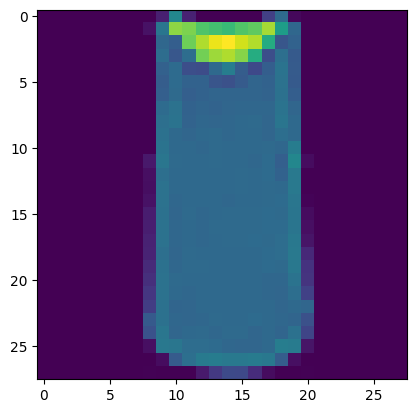

In [21]:
# Plot a single Example
plt.imshow(train_data[2])

In [23]:
# Create a small list so we can index  on our data that is humen readable instead of class numbers 
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Bag')

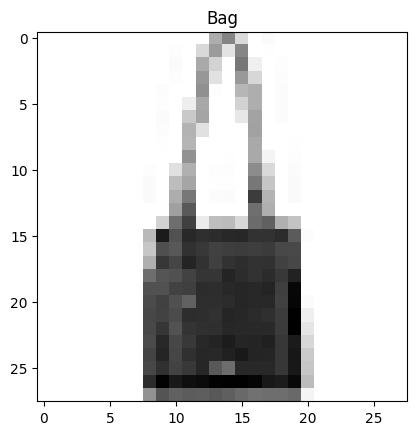

In [31]:
index = 200
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

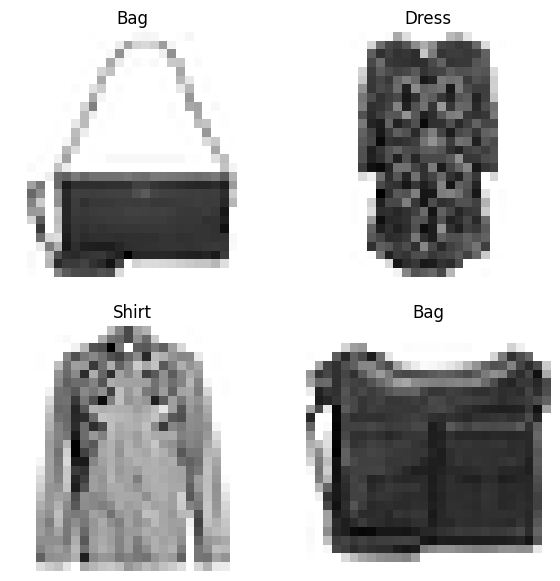

In [44]:
import random
plt.figure(figsize=(7,7))

for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)


## Building a Multiclass Classification Model

For our multiclass classification model we can use similar model to binary classificaiton but we need to change some things.

* Input Shape: 28 x 28 (the shape of 1 image)
* Output Shape: 10 classes in our data
* Loss Function: tf.keras.losses.CategoricalCrossentropy()
  * If your Labels are one hot encoded use CategoricalCrossentropy()
  * Else if your labels are integer form use SparseCategoricalCrossentropy( )
* Output Activation: Softmax() not Sigmoid()

In [46]:
train_data[0].shape, len(class_names)

((28, 28), 10)

In [53]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# 4. Train the model

non_norm_history = model_1.fit(train_data,tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data,tf.one_hot(test_labels,depth=10)))


Epoch 1/10
1875/1875 [==============================] - 2s 967us/step - loss: 2.1286 - accuracy: 0.1692 - val_loss: 1.8144 - val_accuracy: 0.1960
Epoch 2/10
1875/1875 [==============================] - 2s 819us/step - loss: 1.7330 - accuracy: 0.2455 - val_loss: 1.6876 - val_accuracy: 0.2802
Epoch 3/10
1875/1875 [==============================] - 2s 803us/step - loss: 1.6664 - accuracy: 0.2758 - val_loss: 1.6397 - val_accuracy: 0.2756
Epoch 4/10
1875/1875 [==============================] - 2s 839us/step - loss: 1.6391 - accuracy: 0.2760 - val_loss: 1.6280 - val_accuracy: 0.2828
Epoch 5/10
1875/1875 [==============================] - 1s 787us/step - loss: 1.6248 - accuracy: 0.2784 - val_loss: 1.6065 - val_accuracy: 0.2808
Epoch 6/10
1875/1875 [==============================] - 1s 795us/step - loss: 1.6109 - accuracy: 0.2781 - val_loss: 1.6016 - val_accuracy: 0.2791
Epoch 7/10
1875/1875 [==============================] - 1s 768us/step - loss: 1.6047 - accuracy: 0.2806 - val_loss: 1.6067 -

In [54]:
# Check the model Summary

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 4)                 3140      
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Check the min and max values of train and test data
train_data.min(), train_data.max()

(0, 255)

Neural Networks prefer data to be scaled ( or normalized ), this means they like numbers in the tensor to be in the range 0, 1. ( Normalised Data)

- Right now we have 0 and 255 as our min and max values. We need to normlize this to be in range between 0 and 1

In [56]:
# We can get our training and testing data between 0 and 1 by dividing the data by maximum
train_data_norm = train_data/255.
test_data_norm = test_data/255.

# Check the min and max values of the scaled train and test data

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [57]:
# Now our data is normalised, let's build a model to find patterns in it

# set the random seed
tf.random.set_seed(42)

# create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
norm_history = model_2.fit(train_data_norm,
                           train_labels,
                           epochs=10, 
                           validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5187 - accuracy: 0.3945 - val_loss: 1.1590 - val_accuracy: 0.5783
Epoch 2/10
1875/1875 [==============================] - 2s 838us/step - loss: 0.9289 - accuracy: 0.6699 - val_loss: 0.8425 - val_accuracy: 0.7012
Epoch 3/10
1875/1875 [==============================] - 2s 837us/step - loss: 0.7455 - accuracy: 0.7541 - val_loss: 0.7391 - val_accuracy: 0.7596
Epoch 4/10
1875/1875 [==============================] - 2s 845us/step - loss: 0.6741 - accuracy: 0.7815 - val_loss: 0.6889 - val_accuracy: 0.7772
Epoch 5/10
1875/1875 [==============================] - 2s 854us/step - loss: 0.6367 - accuracy: 0.7904 - val_loss: 0.6566 - val_accuracy: 0.7827
Epoch 6/10
1875/1875 [==============================] - 2s 834us/step - loss: 0.6145 - accuracy: 0.7951 - val_loss: 0.6602 - val_accuracy: 0.7816
Epoch 7/10
1875/1875 [==============================] - 2s 894us/step - loss: 0.6029 - accuracy: 0.7995 - val_loss: 0.6419 - v

**NOTE**: Nueral Networks tends to Perform better when data is normalized

<Axes: title={'center': 'Normalized Data'}>

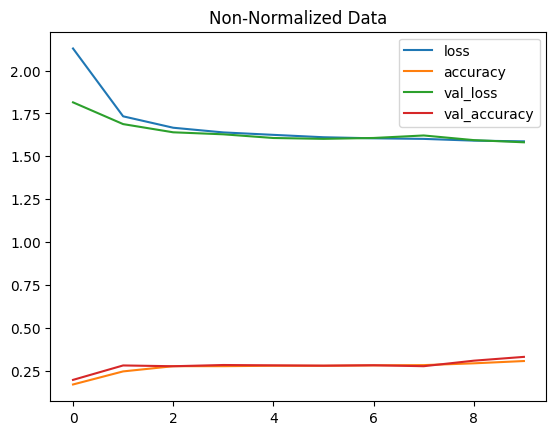

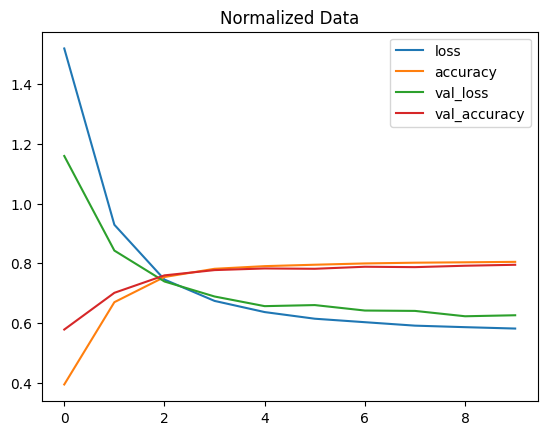

In [59]:
import pandas as pd

# Lets compare the loss curves of each model

# plot non-normalized plot curves
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized Data")

# Plot the Normalized plot curves
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

* A same model with Slightly different data can produce *dramatically* different results. So when comparing the models, it's important to make sure you're comparing them on the same criteria e,g. (same data but different model architectures or different data but same model architecture).

## Finding the ideal learning rate


In [61]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# create the learning rate schedular callback
learning_rate_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

# 3. Fit the model 
find_lr_rate = model_3.fit(train_data_norm,
                           train_labels,
                           epochs=40,
                           callbacks=[learning_rate_schedular],
                           validation_data=(test_data_norm,test_labels))

Epoch 1/40
1875/1875 [==============================] - 2s 952us/step - loss: 1.2895 - accuracy: 0.5034 - val_loss: 0.8619 - val_accuracy: 0.6674 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 2s 843us/step - loss: 0.7665 - accuracy: 0.7273 - val_loss: 0.7350 - val_accuracy: 0.7450 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 2s 851us/step - loss: 0.6713 - accuracy: 0.7657 - val_loss: 0.6718 - val_accuracy: 0.7687 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 2s 881us/step - loss: 0.6138 - accuracy: 0.7887 - val_loss: 0.6242 - val_accuracy: 0.7890 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 1s 789us/step - loss: 0.5827 - accuracy: 0.8002 - val_loss: 0.6063 - val_accuracy: 0.7970 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 1s 753us/step - loss: 0.5657 - accuracy: 0.8064 - val_loss: 0.6566 - val_accuracy: 0.7732 - lr: 0.0018
Epoch 7/40
1875/1875 [========================

Text(0.5, 1.0, 'Learning rate VS Loss')

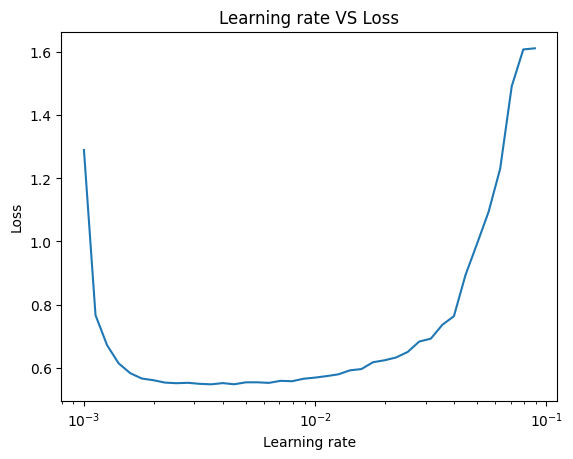

In [67]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.semilogx(lrs, find_lr_rate.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title("Learning rate VS Loss")

In [68]:
10**-3

0.001

In [69]:
## Let's refit the model with the ideal learning rate.

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit the model
model_4_history = model_4.fit(train_data_norm,
                              train_labels,
                              epochs=20,
                              validation_data=(test_data_norm, test_labels))


Epoch 1/20
1875/1875 [==============================] - 2s 902us/step - loss: 1.1869 - accuracy: 0.5490 - val_loss: 0.8325 - val_accuracy: 0.7103
Epoch 2/20
1875/1875 [==============================] - 2s 868us/step - loss: 0.7504 - accuracy: 0.7422 - val_loss: 0.7395 - val_accuracy: 0.7437
Epoch 3/20
1875/1875 [==============================] - 2s 864us/step - loss: 0.6875 - accuracy: 0.7632 - val_loss: 0.6961 - val_accuracy: 0.7603
Epoch 4/20
1875/1875 [==============================] - 2s 846us/step - loss: 0.6574 - accuracy: 0.7749 - val_loss: 0.6791 - val_accuracy: 0.7713
Epoch 5/20
1875/1875 [==============================] - 2s 929us/step - loss: 0.6409 - accuracy: 0.7832 - val_loss: 0.6695 - val_accuracy: 0.7730
Epoch 6/20
1875/1875 [==============================] - 2s 813us/step - loss: 0.6270 - accuracy: 0.7885 - val_loss: 0.6658 - val_accuracy: 0.7760
Epoch 7/20
1875/1875 [==============================] - 1s 752us/step - loss: 0.6174 - accuracy: 0.7918 - val_loss: 0.6809 -